In [262]:
import pandas as pd
import sqlite3

In [263]:
DB = "../data/checking-logs.sqlite"

conn = sqlite3.connect(DB)
query = """
SELECT timestamp AS datetime
FROM checker
WHERE uid LIKE 'user_%';
"""
data = pd.read_sql(query,conn)
conn.close()


data['date'] = pd.to_datetime(data['datetime']).dt.date
data['hour'] = pd.to_datetime(data['datetime']).dt.strftime('%H:%M:%S')


data = data.drop('datetime',axis=1)

In [264]:
data['evening'] = ((data['hour'] >= '17:00:00') & (data['hour'] < '23:59:59')).astype(int)
data['afternoon'] = ((data['hour'] >= '10:00:00') & (data['hour'] < '16:59:59')).astype(int)
data['morning'] = ((data['hour'] >= '04:00:00') & (data['hour'] < '09:59:59')).astype(int)
data['night'] = ((data['hour'] >= '00:00:00') & (data['hour'] < '03:59:59')).astype(int)



data.head(5)

,date,hour,evening,afternoon,morning,night
0,2020-04-17,05:19:02,0,0,1,0
1,2020-04-17,05:22:35,0,0,1,0
2,2020-04-17,05:22:45,0,0,1,0
3,2020-04-17,05:34:14,0,0,1,0
4,2020-04-17,05:34:24,0,0,1,0


In [265]:
data_bar = data.groupby('date')[['morning','afternoon','evening','night']].sum()
print(data_bar.info())
data_bar.head(10)


<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 2020-04-17 to 2020-05-21
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   morning    35 non-null     int64
 1   afternoon  35 non-null     int64
 2   evening    35 non-null     int64
 3   night      35 non-null     int64
dtypes: int64(4)
memory usage: 1.4+ KB
None


,morning,afternoon,evening,night
date,,,,
2020-04-17,13,10,0,0
2020-04-18,1,33,35,0
2020-04-19,4,16,11,2
2020-04-20,0,12,13,0
2020-04-21,0,0,25,0
2020-04-22,0,4,24,0
2020-04-23,6,15,20,2
2020-04-24,0,4,12,0
2020-04-25,21,33,49,1


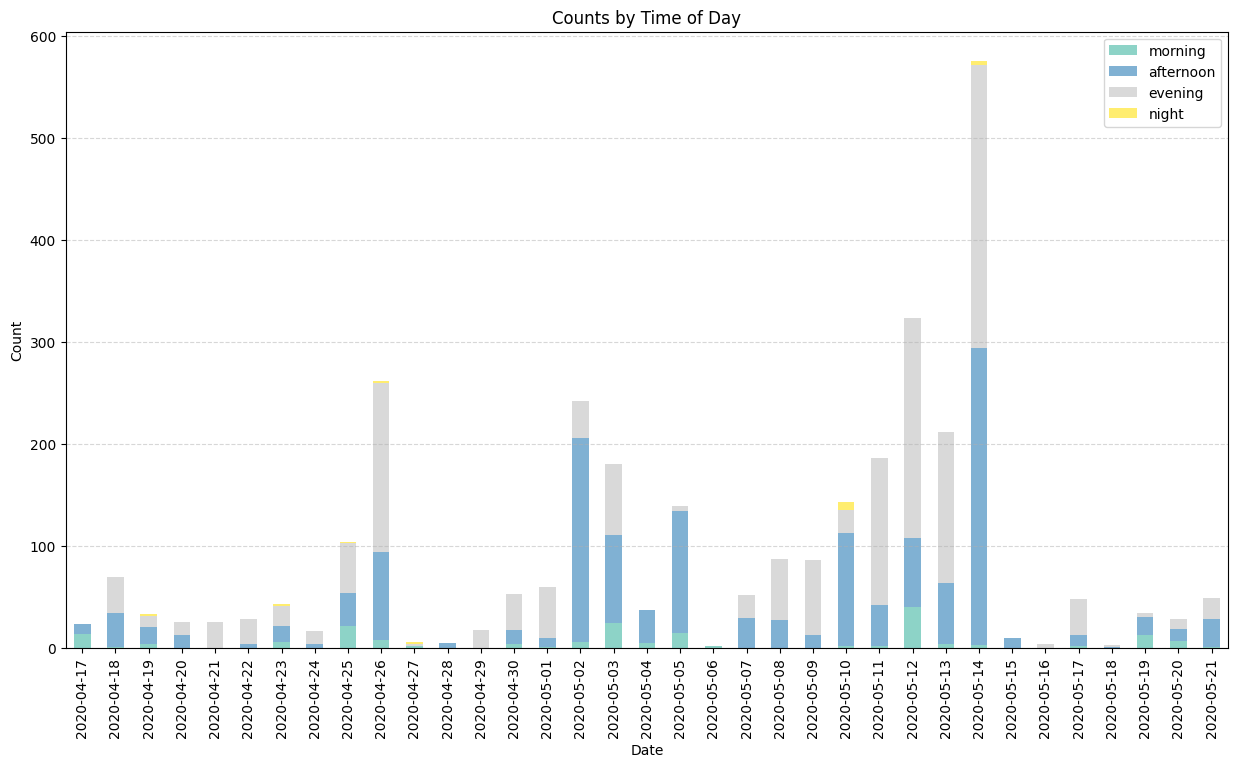

In [266]:
bar = data_bar.plot.bar(
    stacked=True, 
    figsize=(15, 8),
    colormap='Set3',  
    fontsize=10,
    title='Counts by Time of Day',
    xlabel='Date',
    ylabel='Count'
)


bar.grid(axis='y', linestyle='--', alpha=0.5)

When do our users usually commit the labs: in the night, morning, afternoon, or evening?

The answer is in evening and afternoon.

The answer is 2020-05-12 of that day.